Não esquecer de colocar um detetor de data-drift

Features `s3BucketLogging` `Dockerizing` `E-mail`

Implementar Tkinter

Implementar Batchs Prediction

Step-by-step to reproducitibity

Create a .ENV

@dataclass
ClassConfiguration

ClassArtifacts

MLFlow in DagsHub, and DVC

We are going to train our model locally.

Conda Environment with python `3.10.15`

The focus of this project is on the code, to build an automated CICD pipeline in industry level code

Usar tkinter para melhorar a estrutura do input

# Project Structure Explanation

Data Versioning

Create a `S3 bucket` for saving the loggings

## Components

Data Validation

GitHub Workflows

Durante a criação do training pode passar um classe de `Params`

DVC

# Step by Step Implementation

## MVP - Minimal Viable Solution

In this step we aim to build a  minimal model capable of solving the business problem

In `.\mvp-notebook`: 

* `1-mvp-development.ipynb` - exploratory data analysys, for data quality assurancem data understanding; model pipeline (preprocessing, training) creation, and evaluation.

Please, make sure to check this file.

The result of the best model is `r2_score of 88,31%` and `mean absolute error of 4,14`, which are great results, considering that our target variable, varies from `9-100`

## Data Versioning With DVC

Organizes images, audio, files, video and text in **storage** and organize your ml modeling into a **reproductible** workflow

**✨ Basic Uses of DVC**

If you store and process data files 📂 or datasets 📊 to produce other data or machine learning models 🤖, and you want to:

📝 Track and save data and ML models just like you do with code;

🔄 Create and switch between **versions of data** and ML models easily;

🔍 Understand how datasets and ML artifacts were built in the first place;

📊 Compare model metrics among experiments;

🛠️ Adopt engineering tools and best practices in data science projects;

We are going to focus on the Data Versioning Functionalities, later we will, use the DVC to improve our pipeline (make able to restart the pipeline from which step the code stopped)

### Setting Up DVC

In [ ]:
# Initialize DVC in Your Project
! dvc init

Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [ ]:
# Stop Git from Tracking students.csv
! git rm -r --cached raw_data/students.csv
! git commit -m "Stop tracking raw_data/students.csv with Git"

rm 'raw_data/students.csv'
[main 977b1c5] Stop tracking raw_data/students.csv with Git
 4 files changed, 6 insertions(+), 1001 deletions(-)
 create mode 100644 .dvc/.gitignore
 create mode 100644 .dvc/config
 create mode 100644 .dvcignore
 delete mode 100644 raw_data/students.csv


In [ ]:
# Track the students.csv File
! dvc add raw_data/students.csv


To track the changes with git, run:

	git add 'raw_data\students.csv.dvc' 'raw_data\.gitignore'

To enable auto staging, run:

	dvc config core.autostage true


⠋ Checking graph



In [ ]:
# Commit Changes to Git
! git add raw_data/students.csv.dvc .gitignore
! git commit -m "Track raw_data/students.csv with DVC"

[main 934b499] Track raw_data/students.csv with DVC
 1 file changed, 5 insertions(+)
 create mode 100644 raw_data/students.csv.dvc


Now the DVC is taking care of our data versioning control.

The versions are being cached, and can be restored by as checkpoints by the md5 identifier

### DVC common Commands

#### Changing the Data Version (Local):

1. Update the file

2. Update the DVC Tracking

```Bash
dvc add raw_data/students.csv
```

3. Commit Changes to Git

```Bash
git add raw_data/students.csv.dvc
git commit -m "Updated raw_data/students.csv to the new version <insert details of data version here, or control it by a external log>"
```

#### Restoring an Older Data Version(Local)

1. Identify the Desired Git Commit

```Bash
git log
```

Look for the commit message related to the version you want to restore.

2. Checkout the Desired Commit

```bash
git checkout <commit_hash>
```

3. Checkout the Desired Commit

```bash
dvc checkout
```

**This is will probably change your git status to detached HEAD, be sure to return it and to merge all the necessaries changes**


Further on this project we are going to set a remote repository `DagsHub` to our `DVC` (now, the data versions are within the folder `/.dvc/cache`), and to our `MLFlow Experiment Tracking`

## Utilities

Done inside `src/utils`

Basically created the all the files, that we are going to use in our pipelines to:

* Send e-mails;
* Log; and
* Handle Files

To use e-mails in python you need to create a password App:

**Use App Passwords (Recommended for 2FA accounts)**:

1. Go to your Google Account settings.
2. Navigate to Security, then click on App Passwords.
3. Select Mail and Other (Custom name), then generate the password.
4. This will give you a 16-character password that you can use in your Python script instead of your Google account password.





## Components Implementation

Entities (dataclasses) -> components -> init.py(instantiate) -> pipeline(call methods)

In entities, we are going to have the inputs (configurations) and the output(artifacts)

Componentes Create the methods

In the pipelines, we assemble together our components


Componente
* Artefatos Anteriores
* Artefatos Superiores
* Parâmetrps imputados pelo usuário

Implementar um react para fazer as configurações

Validação do modelo

### Data Ingestion

### Data Validation

`schemas/`

`   reference_stats.json`

`   data_structure.py`

`research/`

`   data_validation.ipynb`

Check Data Format with `Pandera` and `validate data drift`

We basically created a tool for validating that our input share critical properties with the data in which we developed the preprocessing steps, and trained our model (this aims to avoid a lot of headache)

Checks for data depreciation (differences on the distributions of the dataframe we train and the new)

### Model Training Loop

## Pipelines Implementation

### Train Pipeline

Sempre rodar tendo por base o root folder, desta forma não haverá problema de import
(mlops-cicd) C:\Users\Marina\Desktop\cicd-project>python -m src.pipelines.training_pipeline

### Predict Pipeline

Criar a pipeline predition e batch pipeline prediction

Upar o Logging no S3Bucket, ou no volume do ECR, salvar os NP arrays das predições

Montar o .ENV passando variáveis de ambientes, ou montando no volume, jamais upar o .env na dockerfile

```yaml
- name: Run Docker Image to serve users
  run: |
    echo "Creating .env file from GitHub Secrets"
    echo "AWS_ACCESS_KEY_ID=${{ secrets.AWS_ACCESS_KEY_ID }}" >> .env
    echo "AWS_SECRET_ACCESS_KEY=${{ secrets.AWS_SECRET_ACCESS_KEY }}" >> .env
    echo "AWS_REGION=${{ secrets.AWS_REGION }}" >> .env
    echo "OTHER_ENV_VAR=${{ secrets.OTHER_ENV_VAR }}" >> .env

    docker run -d -p 8080:8080 \
      --name cnncls \
      -v $(pwd)/.env:/app/.env \
      ${{secrets.AWS_ECR_LOGIN_URI}}/${{ secrets.ECR_REPOSITORY_NAME }}:latest
```


```python
from dotenv import load_dotenv
import os

# Load the .env file
load_dotenv(dotenv_path="/app/.env")

# Access environment variables
aws_key = os.getenv("AWS_ACCESS_KEY_ID")
aws_secret = os.getenv("AWS_SECRET_ACCESS_KEY")
region = os.getenv("AWS_REGION")

print(f"Using AWS Region: {region}")


```

### API Endpoint local

```bash
python app.py
```

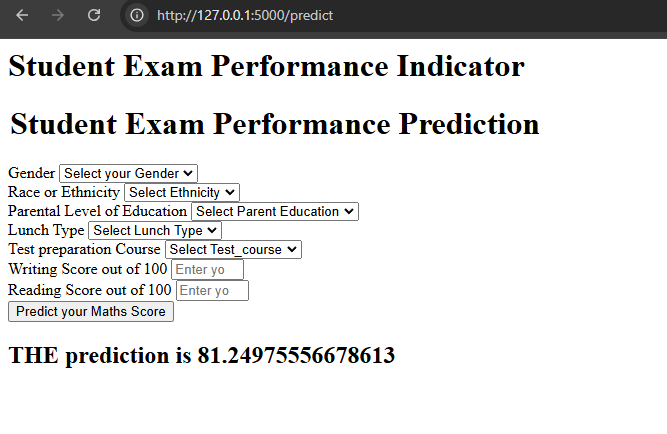

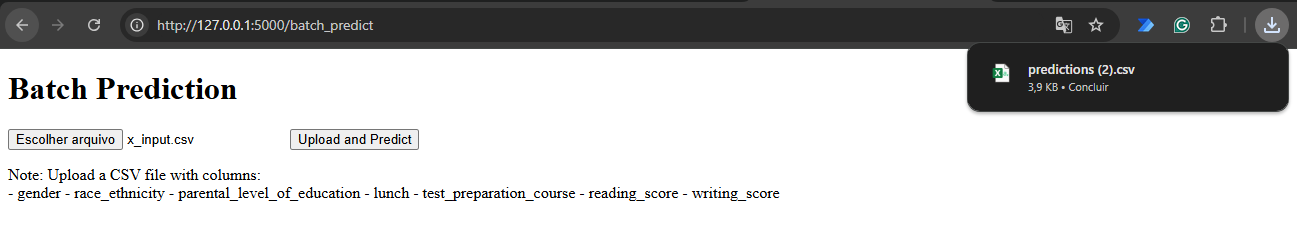

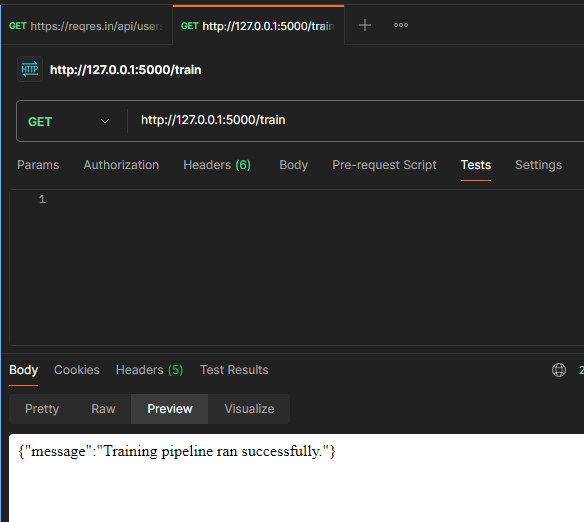


### Implementing MlFlow

We are going to use DagsHub, so we can store our MLFlow Experiments in the cloud,

Create an account in dagshub, go to the home -> Create + -> New Repository -> Connect a repository -> GitHub -> Choose your repository -> Connect Repository

Getting your Credentials -> Remote -> Experiments -> Get your MLFlow Tracking Remote

Click on Your profile photo -> Your settings -> Get Your Username

Your settings -> Tokens -> Copy your Access token

Update, your .env with those informations

```python
MLFLOW_TRACKING_URI = "https://dagshub.com/yourusername/your-repository-name.mlflow"
MLFLOW_TRACKING_USERNAME ="AlisonZa"
MLFLOW_TRACKING_PASSWORD ="40 digits access token"
```



The function that we created to log the results into mlflow is in `src.components.model_training.py.log_to_mlflow`

This Function only logs the artifacts to Mlflow, but we can also, in case it is needed, the library to keep track of our model training (saving hyperparameters and metrics), we are already doing that in our artifacts/model_training/results.xlsx. So there is no need of that.  

Results:

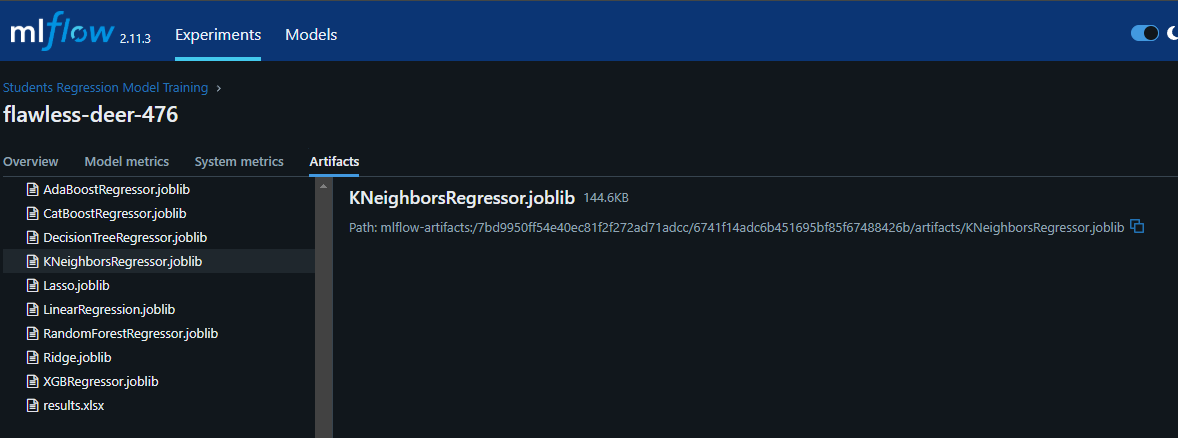

## Differents Approachs Reusing the Same File Project



The aim of this project, was to make a fully automated, data-centric project however with little adjustements this project could support human interation, such as:

* Train different Models, report their performance, and asks to the user which one of them he want to tune, as well with the Grid Search Parameters;

* Perform the process above, and ask what models the user wants to ensemble;

* These process could run automatically, and them notify via e-mail(or a dashboard) when the user needs to interact;

* The inputs could be done by `.txt`, `.csv`, `.yml`, or even the standart python input function. The DVC functionality, kinds of "cache" the process so we can return from which step we end, without losing much time; and

* If that is our objective, we can implement and iterative human-in-the-loop Error-Analysys/Feature Engineering.

* This was not strictaly necessary in this project, but if in a future application we want to support use interactions, we could, accept `params.yaml` and `config.yaml` inputs, validate them throght `yamale` or `cerberus`,read throught the already existing utils read_yaml function  


By doing that, we will have a process with less automation, but with greater performance and more human control

By now this code is triggered by pull/push, however it also can be triggered by different options, and be classified as **`Continous Training(CT)`**(for now the re-training is triggered by the user) with a few adjustements:

* Locally (cost saving) we could use the windows `task_scheduler` to run a `.py` file that checks for changes in our dataset(number of samples as an example) time by time(every 4 hours as an example), and then triggers our pipeline once some condition gets satisfied.

* Cloud, we could use some service, such as `AWS lambda`, uncomment the endpoint of `/train` (commented for deployment), and them trigger this endpoint when some condition gets satisffied.

Maintenance

* This code is basically maintaned, by change the `@dataclass` in `componentent`, the methods of this class, and then the pipelines. However, some people might prefer to create a `\.config` folder, and them put some files: [`config.yml`, `params.yml`, `schemas.yml`], that way the user made the changes in those files. I prefer to use directly the python file, because it is cleaner, more readable, and very easy to mantain, and simpler to add new functionalities.


Futuer improvements, implement Neural networks that deals with tabular data, and RapidsAI, in case someones got a GPU (performance gains)

The project could use an automatically ensemble part

Dinamically handle different file extensions



### Code Mainentance

For a new dataframe

1.  Update the reference stats

```python
import pandas as pd
import json

# Example reference data
reference_data = pd.read_csv("raw_data/students.csv")

# Compute statistics
reference_stats = {}

# Numerical features
for feature in numeric_features:
    reference_stats[feature] = {
        "mean": reference_data[feature].mean(),
        "std": reference_data[feature].std(),
        "percentiles": reference_data[feature].quantile([0.25, 0.5, 0.75]).to_dict()
    }

# Categorical features
for feature in categorical_features:
    reference_stats[feature] = {
        "value_counts": reference_data[feature].value_counts(normalize=True).to_dict(),
    }

# Save to a JSON file
with open("schemas/reference_stats.json", "w") as f:
    json.dump(reference_stats, f)
```

2. Update the Pandera Class

For new Steps/components:

1. Update The Entities.py with the Input/Artifact/Configuration class for the step

2. Create a new component file, create a class importing the @dataclasses of the previous step. Creathe the methods

3. Update the pipeline

### Acknowledgements